In [2]:
!pip install pandas numpy scikit-learn lightgbm imbalanced-learn matplotlib seaborn

  Using cached lightgbm-4.6.0-py3-none-win_amd64.whl.metadata (17 kB)
Using cached lightgbm-4.6.0-py3-none-win_amd64.whl (1.5 MB)

   ---------------------------------------- 0/3 [lightgbm]
   ---------------------------------------- 0/3 [lightgbm]
   ------------- -------------------------- 1/3 [sklearn-compat]
   -------------------------- ------------- 2/3 [imbalanced-learn]
   -------------------------- ------------- 2/3 [imbalanced-learn]
   -------------------------- ------------- 2/3 [imbalanced-learn]
   -------------------------- ------------- 2/3 [imbalanced-learn]
   ---------------------------------------- 3/3 [imbalanced-learn]



클래스 분포:
Target_Class
0    9652
2     115
3      91
4      78
1      64
Name: count, dtype: int64

클래스 비율:
Target_Class
0    0.9652
2    0.0115
3    0.0091
4    0.0078
1    0.0064
Name: proportion, dtype: float64

SMOTE 후 학습 데이터 클래스 분포:
Target_Class
0    7722
4    7722
3    7722
2    7722
1    7722
Name: count, dtype: int64

=== 분류 리포트 ===
              precision    recall  f1-score   support

          정상       0.99      0.99      0.99      1930
     TWF/RNF       0.07      0.08      0.07        13
         HDF       0.92      0.96      0.94        23
         PWF       1.00      0.94      0.97        18
         OSF       0.88      0.88      0.88        16

    accuracy                           0.98      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.98      0.98      0.98      2000



d:\Users\admin\anaconda3\envs\py310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
d:\Users\admin\anaconda3\envs\py310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\admin\AppData\Local\Temp\ipykernel_11900\408525156.py:101: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\admin\AppData\Local\Temp\ipykernel_11900\408525156.py:101: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\admin\AppData\Local\Temp\ipykernel_11900\408525156.py:101: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\admin\AppData\Local\Temp\ipykernel_11900\408525156.py:101: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE


혼동 행렬이 'confusion_matrix.png'로 저장되었습니다.

=== 특성 중요도 TOP 10 ===
                feature  importance
4         Tool_wear_min        3431
5             Temp_Diff        3012
6                 Power        2842
2  Rotational_speed_rpm        2739
8     Tool_Wear_Squared        2266
1        Process_temp_K        2131
0            Air_temp_K        1900
3             Torque_Nm        1653
7    Torque_Speed_Ratio        1317
9                Type_H         760

=== 클래스별 F1-Score ===
정상: 0.991
TWF/RNF: 0.071
HDF: 0.936
PWF: 0.971
OSF: 0.875


d:\Users\admin\anaconda3\envs\py310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Users\admin\anaconda3\envs\py310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Users\admin\anaconda3\envs\py310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Users\admin\anaconda3\envs\py310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Users\admin\anaconda3\envs\py310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54844 (\N{HANGUL SYLLABLE HON}) missing f

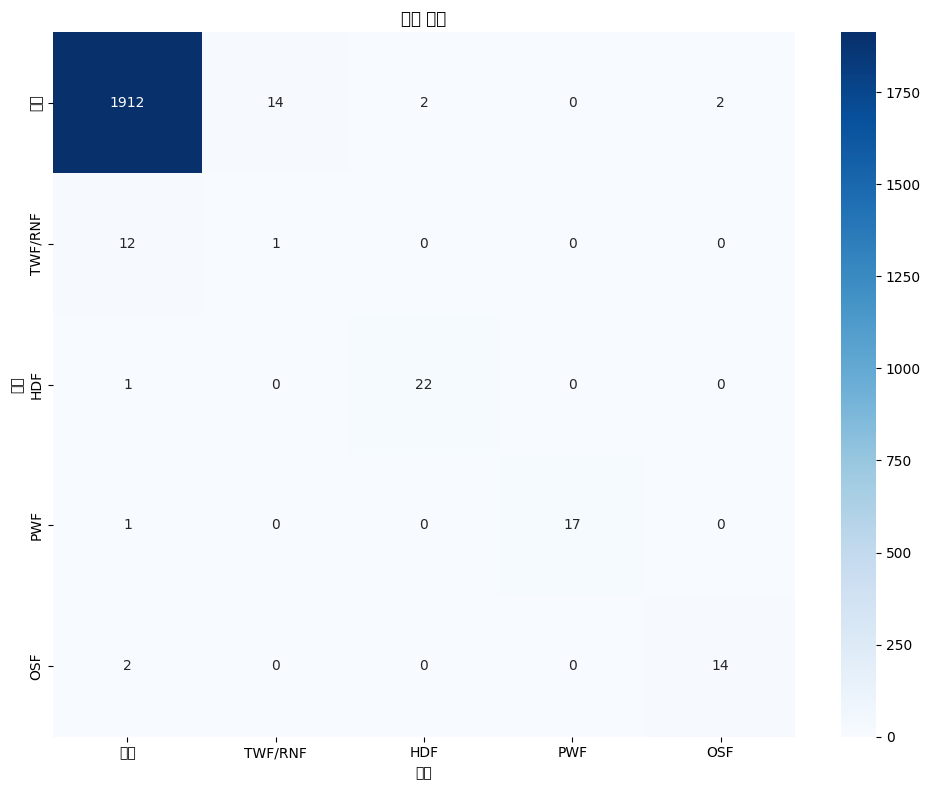

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 로드
df = pd.read_csv('./machine_failure.csv')

df.rename(columns={
    'Air temperature [K]': 'Air_temp_K',
    'Process temperature [K]': 'Process_temp_K',
    'Rotational speed [rpm]': 'Rotational_speed_rpm',
    'Torque [Nm]': 'Torque_Nm',
    'Tool wear [min]': 'Tool_wear_min'
}, inplace=True)

# 2. 타겟 변수 생성
def create_target(row):
    if row['TWF'] == 1 or row['RNF'] == 1: 
        return 1  # "희귀 고장"으로 통합
    if row['HDF'] == 1: return 2
    if row['PWF'] == 1: return 3
    if row['OSF'] == 1: return 4
    return 0

df['Target_Class'] = df.apply(create_target, axis=1)

# 클래스 분포 확인
print("클래스 분포:")
print(df['Target_Class'].value_counts())
print("\n클래스 비율:")
print(df['Target_Class'].value_counts(normalize=True))

# 3. 특성 엔지니어링
df['Temp_Diff'] = df['Process_temp_K'] - df['Air_temp_K']
df['Power'] = df['Torque_Nm'] * df['Rotational_speed_rpm'] * 2 * np.pi / 60
df['Torque_Speed_Ratio'] = df['Torque_Nm'] / (df['Rotational_speed_rpm'] + 1)
df['Tool_Wear_Squared'] = df['Tool_wear_min'] ** 2

features = ['Air_temp_K', 'Process_temp_K', 
            'Rotational_speed_rpm', 'Torque_Nm', 'Tool_wear_min', 
            'Temp_Diff', 'Power', 'Torque_Speed_Ratio', 'Tool_Wear_Squared']

X = df[features].copy()
y = df['Target_Class']

# Type 더미 변수화
X = pd.concat([X, pd.get_dummies(df['Type'], prefix='Type')], axis=1)

# 4. 데이터 분할 (stratify 유지)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 5. SMOTE로 오버샘플링 (학습 데이터만!)
smote = SMOTE(random_state=42, k_neighbors=2)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("\nSMOTE 후 학습 데이터 클래스 분포:")
print(pd.Series(y_train_balanced).value_counts())

# 6. 모델 학습 (개선된 하이퍼파라미터)
model = LGBMClassifier(
    n_estimators=200,
    learning_rate=0.05,
    num_leaves=31,
    max_depth=7,
    min_child_samples=20,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42,
    class_weight='balanced',  # 추가 가중치
    verbose=-1
)

model.fit(X_train_balanced, y_train_balanced)

# 7. 예측 및 평가
y_pred = model.predict(X_test)

print("\n=== 분류 리포트 ===")
print(classification_report(y_test, y_pred, 
                          target_names=['정상', 'TWF/RNF', 'HDF', 'PWF', 'OSF']))

# 8. 혼동 행렬 시각화
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['정상', 'TWF/RNF', 'HDF', 'PWF', 'OSF'],
            yticklabels=['정상', 'TWF/RNF', 'HDF', 'PWF', 'OSF'])
plt.ylabel('실제')
plt.xlabel('예측')
plt.title('혼동 행렬')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
print("\n혼동 행렬이 'confusion_matrix.png'로 저장되었습니다.")

# 9. 특성 중요도
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n=== 특성 중요도 TOP 10 ===")
print(feature_importance.head(10))

# 10. 클래스별 성능 분석
print("\n=== 클래스별 F1-Score ===")
for i, class_name in enumerate(['정상', 'TWF/RNF', 'HDF', 'PWF', 'OSF']):
    f1 = f1_score(y_test == i, y_pred == i)
    print(f"{class_name}: {f1:.3f}")

In [ ]:
# 추가 분석 코드 - 기존 코드 끝에 추가

print("\n" + "=" * 50)
print("=== TWF/RNF 상세 분석 ===")
print("=" * 50)

# TWF와 RNF 원본 데이터 분리
twf_data = df[df['TWF'] == 1]
rnf_data = df[df['RNF'] == 1]
normal_data = df[df['Target_Class'] == 0].sample(100, random_state=42)  # 정상 샘플

print(f"\nTWF 샘플 수: {len(twf_data)}")
print(f"RNF 샘플 수: {len(rnf_data)}")

# 주요 특성 비교
features_to_compare = ['Tool_wear_min', 'Temp_Diff', 'Power', 'Rotational_speed_rpm']

print("\n--- TWF 평균 특성 ---")
print(twf_data[features_to_compare].mean())

print("\n--- RNF 평균 특성 ---")
print(rnf_data[features_to_compare].mean())

print("\n--- 정상 평균 특성 ---")
print(normal_data[features_to_compare].mean())

print("\n--- 차이 분석 ---")
print("TWF와 정상의 차이:")
print((twf_data[features_to_compare].mean() - normal_data[features_to_compare].mean()).abs())

print("\nRNF와 정상의 차이:")
print((rnf_data[features_to_compare].mean() - normal_data[features_to_compare].mean()).abs())

print("\nTWF와 RNF의 차이:")
print((twf_data[features_to_compare].mean() - rnf_data[features_to_compare].mean()).abs())


=== TWF/RNF 상세 분석 ===

TWF 샘플 수: 46
RNF 샘플 수: 19

--- TWF 평균 특성 ---
Tool_wear_min            216.369565
Temp_Diff                  9.867391
Power                   6019.326127
Rotational_speed_rpm    1566.173913
dtype: float64

--- RNF 평균 특성 ---
Tool_wear_min            124.473684
Temp_Diff                  9.947368
Power                   6685.701039
Rotational_speed_rpm    1485.000000
dtype: float64

--- 정상 평균 특성 ---
Tool_wear_min            106.020000
Temp_Diff                 10.032000
Power                   6207.409045
Rotational_speed_rpm    1541.540000
dtype: float64

--- 차이 분석 ---
TWF와 정상의 차이:
Tool_wear_min           110.349565
Temp_Diff                 0.164609
Power                   188.082918
Rotational_speed_rpm     24.633913
dtype: float64

RNF와 정상의 차이:
Tool_wear_min            18.453684
Temp_Diff                 0.084632
Power                   478.291994
Rotational_speed_rpm     56.540000
dtype: float64

TWF와 RNF의 차이:
Tool_wear_min            91.895881
Temp_Diff      

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 로드
df = pd.read_csv('./machine_failure.csv')

df.rename(columns={
    'Air temperature [K]': 'Air_temp_K',
    'Process temperature [K]': 'Process_temp_K',
    'Rotational speed [rpm]': 'Rotational_speed_rpm',
    'Torque [Nm]': 'Torque_Nm',
    'Tool wear [min]': 'Tool_wear_min'
}, inplace=True)

# 2. ★★★ TWF 임계값 기반 탐지 ★★★
TWF_THRESHOLD = 200  # Tool wear 200분 이상이면 TWF 의심

def create_target_smart(row):
    # TWF는 규칙으로 먼저 체크
    if row['Tool_wear_min'] >= TWF_THRESHOLD:
        return 1  # TWF
    # RNF는 따로 분류
    if row['RNF'] == 1:
        return 2  # RNF
    if row['HDF'] == 1:
        return 3  # HDF
    if row['PWF'] == 1:
        return 4  # PWF
    if row['OSF'] == 1:
        return 5  # OSF
    return 0  # 정상

df['Target_Class'] = df.apply(create_target_smart, axis=1)

print("=" * 50)
print("클래스 분포:")
print(df['Target_Class'].value_counts().sort_index())
print("\n클래스 비율:")
print(df['Target_Class'].value_counts(normalize=True).sort_index())
print("=" * 50)

# 3. 특성 엔지니어링
df['Temp_Diff'] = df['Process_temp_K'] - df['Air_temp_K']
df['Power'] = df['Torque_Nm'] * df['Rotational_speed_rpm'] * 2 * np.pi / 60
df['Torque_Speed_Ratio'] = df['Torque_Nm'] / (df['Rotational_speed_rpm'] + 1)
df['Tool_Wear_Squared'] = df['Tool_wear_min'] ** 2

features = ['Air_temp_K', 'Process_temp_K', 
            'Rotational_speed_rpm', 'Torque_Nm', 'Tool_wear_min', 
            'Temp_Diff', 'Power', 'Torque_Speed_Ratio', 'Tool_Wear_Squared']

X = df[features].copy()
y = df['Target_Class']

# Type 더미 변수화
X = pd.concat([X, pd.get_dummies(df['Type'], prefix='Type')], axis=1)

# 4. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 5. SMOTE
smote = SMOTE(random_state=42, k_neighbors=2)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("\nSMOTE 후 학습 데이터 클래스 분포:")
print(pd.Series(y_train_balanced).value_counts().sort_index())
print("=" * 50)

# 6. 모델 학습
model = LGBMClassifier(
    n_estimators=200,
    learning_rate=0.05,
    num_leaves=31,
    max_depth=7,
    min_child_samples=20,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42,
    class_weight='balanced',
    verbose=-1
)

model.fit(X_train_balanced, y_train_balanced)

# 7. ★★★ 규칙 + AI 하이브리드 예측 ★★★
def hybrid_predict(X_test_df, model, threshold=TWF_THRESHOLD):
    """규칙 기반 + AI 예측 조합"""
    predictions = model.predict(X_test_df)
    
    # Tool wear가 임계값 이상이면 무조건 TWF로 예측
    for i in range(len(X_test_df)):
        if X_test_df.iloc[i]['Tool_wear_min'] >= threshold:
            predictions[i] = 1  # TWF
    
    return predictions

# X_test를 DataFrame으로 변환 (iloc 사용 위해)
X_test_df = pd.DataFrame(X_test, columns=X.columns)
y_pred = hybrid_predict(X_test_df, model)

print("\n=== 분류 리포트 (하이브리드 예측) ===")
print(classification_report(y_test, y_pred,
                          target_names=['정상', 'TWF', 'RNF', 'HDF', 'PWF', 'OSF']))

# 8. 혼동 행렬
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'TWF', 'RNF', 'HDF', 'PWF', 'OSF'],
            yticklabels=['Normal', 'TWF', 'RNF', 'HDF', 'PWF', 'OSF'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix (Hybrid Prediction)')
plt.tight_layout()
plt.savefig('confusion_matrix_hybrid.png', dpi=300)
print("\n혼동 행렬이 'confusion_matrix_hybrid.png'로 저장되었습니다.")
plt.close()

# 9. 클래스별 성능
print("\n=== 클래스별 F1-Score ===")
for i, class_name in enumerate(['정상', 'TWF', 'RNF', 'HDF', 'PWF', 'OSF']):
    f1 = f1_score(y_test == i, y_pred == i)
    print(f"{class_name}: {f1:.3f}")

print("\n" + "=" * 50)
print("하이브리드 예측 완료!")
print(f"TWF 임계값: Tool wear >= {TWF_THRESHOLD}분")
print("=" * 50)

# 10. TWF 규칙의 정확도 검증
print("\n=== TWF 규칙 검증 ===")
twf_actual = (y_test == 1).sum()
twf_by_rule = (X_test_df['Tool_wear_min'] >= TWF_THRESHOLD).sum()
print(f"실제 TWF 개수: {twf_actual}")
print(f"규칙으로 잡은 개수: {twf_by_rule}")

# 실제 TWF 중 몇 개를 규칙으로 잡았는지
if twf_actual > 0:
    twf_caught = ((y_test == 1) & (X_test_df['Tool_wear_min'] >= TWF_THRESHOLD)).sum()
    print(f"규칙으로 잡은 TWF: {twf_caught}/{twf_actual} ({twf_caught/twf_actual*100:.1f}%)")

클래스 분포:
Target_Class
0    8975
1     801
2      17
3     104
4      84
5      19
Name: count, dtype: int64

클래스 비율:
Target_Class
0    0.8975
1    0.0801
2    0.0017
3    0.0104
4    0.0084
5    0.0019
Name: proportion, dtype: float64

SMOTE 후 학습 데이터 클래스 분포:
Target_Class
0    7180
1    7180
2    7180
3    7180
4    7180
5    7180
Name: count, dtype: int64

=== 분류 리포트 (하이브리드 예측) ===
              precision    recall  f1-score   support

          정상       1.00      1.00      1.00      1795
         TWF       1.00      1.00      1.00       160
         RNF       0.00      0.00      0.00         3
         HDF       1.00      0.95      0.98        21
         PWF       0.89      1.00      0.94        17
         OSF       0.80      1.00      0.89         4

    accuracy                           0.99      2000
   macro avg       0.78      0.82      0.80      2000
weighted avg       1.00      0.99      1.00      2000


혼동 행렬이 'confusion_matrix_hybrid.png'로 저장되었습니다.

=== 클래스별 F1-Score ===
정상

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 로드
df = pd.read_csv('./machine_failure.csv')

df.rename(columns={
    'Air temperature [K]': 'Air_temp_K',
    'Process temperature [K]': 'Process_temp_K',
    'Rotational speed [rpm]': 'Rotational_speed_rpm',
    'Torque [Nm]': 'Torque_Nm',
    'Tool wear [min]': 'Tool_wear_min'
}, inplace=True)

# 2. ★★★ 올바른 타겟 생성 (원본 라벨 사용) ★★★
def create_target_correct(row):
    # 실제 고장 컬럼을 그대로 사용
    if row['TWF'] == 1:
        return 1  # TWF
    if row['RNF'] == 1:
        return 2  # RNF
    if row['HDF'] == 1:
        return 3  # HDF
    if row['PWF'] == 1:
        return 4  # PWF
    if row['OSF'] == 1:
        return 5  # OSF
    return 0  # 정상

df['Target_Class'] = df.apply(create_target_correct, axis=1)

print("=" * 50)
print("클래스 분포:")
print(df['Target_Class'].value_counts().sort_index())
print("\n클래스 비율:")
print(df['Target_Class'].value_counts(normalize=True).sort_index())
print("=" * 50)

# TWF와 Tool wear 관계 분석
print("\n=== TWF와 Tool Wear 관계 ===")
twf_data = df[df['TWF'] == 1]
normal_data = df[df['Target_Class'] == 0]

print(f"TWF 샘플의 Tool wear 평균: {twf_data['Tool_wear_min'].mean():.1f}분")
print(f"TWF 샘플의 Tool wear 최소값: {twf_data['Tool_wear_min'].min():.1f}분")
print(f"TWF 샘플의 Tool wear 최대값: {twf_data['Tool_wear_min'].max():.1f}분")
print(f"\n정상 샘플의 Tool wear 평균: {normal_data['Tool_wear_min'].mean():.1f}분")
print(f"정상 샘플의 Tool wear 최대값: {normal_data['Tool_wear_min'].max():.1f}분")

# Tool wear >= 200인 정상 샘플 확인
high_wear_normal = normal_data[normal_data['Tool_wear_min'] >= 200]
print(f"\nTool wear >= 200분인 정상 샘플: {len(high_wear_normal)}개")
print("=" * 50)

# 3. 특성 엔지니어링
df['Temp_Diff'] = df['Process_temp_K'] - df['Air_temp_K']
df['Power'] = df['Torque_Nm'] * df['Rotational_speed_rpm'] * 2 * np.pi / 60
df['Torque_Speed_Ratio'] = df['Torque_Nm'] / (df['Rotational_speed_rpm'] + 1)
df['Tool_Wear_Squared'] = df['Tool_wear_min'] ** 2

features = ['Air_temp_K', 'Process_temp_K', 
            'Rotational_speed_rpm', 'Torque_Nm', 'Tool_wear_min', 
            'Temp_Diff', 'Power', 'Torque_Speed_Ratio', 'Tool_Wear_Squared']

X = df[features].copy()
y = df['Target_Class']

# Type 더미 변수화
X = pd.concat([X, pd.get_dummies(df['Type'], prefix='Type')], axis=1)

# 4. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 5. SMOTE
smote = SMOTE(random_state=42, k_neighbors=2)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("\nSMOTE 후 학습 데이터 클래스 분포:")
print(pd.Series(y_train_balanced).value_counts().sort_index())
print("=" * 50)

# 6. 모델 학습
model = LGBMClassifier(
    n_estimators=200,
    learning_rate=0.05,
    num_leaves=31,
    max_depth=7,
    min_child_samples=20,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42,
    class_weight='balanced',
    verbose=-1
)

model.fit(X_train_balanced, y_train_balanced)

# 7. ★★★ 수정된 하이브리드 예측 ★★★
# 먼저 AI가 예측하고, TWF일 확률이 낮은데 Tool wear가 높으면 TWF로 변경
def hybrid_predict_v2(X_test_df, model):
    """AI 예측 + 규칙 기반 보정"""
    # AI 예측
    predictions = model.predict(X_test_df)
    probabilities = model.predict_proba(X_test_df)
    
    # Tool wear 임계값
    TWF_THRESHOLD = 200
    
    # 보정 로직
    for i in range(len(X_test_df)):
        tool_wear = X_test_df.iloc[i]['Tool_wear_min']
        
        # Tool wear가 매우 높고 (200+) AI가 정상 또는 다른 고장으로 예측했으면
        # TWF로 변경 (단, HDF/PWF/OSF일 확률이 높으면 유지)
        if tool_wear >= TWF_THRESHOLD:
            # 다른 고장일 확률이 낮으면 TWF로 변경
            if predictions[i] == 0:  # 정상으로 예측
                predictions[i] = 1  # TWF로 변경
            elif predictions[i] == 2:  # RNF로 예측
                # RNF보다 TWF가 더 그럴듯함
                predictions[i] = 1
    
    return predictions

X_test_df = pd.DataFrame(X_test, columns=X.columns)
y_pred = hybrid_predict_v2(X_test_df, model)

print("\n=== 분류 리포트 (하이브리드 예측 v2) ===")
print(classification_report(y_test, y_pred,
                          target_names=['정상', 'TWF', 'RNF', 'HDF', 'PWF', 'OSF']))

# 8. 혼동 행렬
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'TWF', 'RNF', 'HDF', 'PWF', 'OSF'],
            yticklabels=['Normal', 'TWF', 'RNF', 'HDF', 'PWF', 'OSF'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix (Hybrid v2)')
plt.tight_layout()
plt.savefig('confusion_matrix_hybrid_v2.png', dpi=300)
print("\n혼동 행렬이 'confusion_matrix_hybrid_v2.png'로 저장되었습니다.")
plt.close()

# 9. 클래스별 성능
print("\n=== 클래스별 F1-Score ===")
for i, class_name in enumerate(['정상', 'TWF', 'RNF', 'HDF', 'PWF', 'OSF']):
    f1 = f1_score(y_test == i, y_pred == i)
    print(f"{class_name}: {f1:.3f}")

# 10. TWF 규칙 검증
print("\n" + "=" * 50)
print("=== TWF 상세 분석 ===")
print("=" * 50)

# 실제 TWF
twf_actual = (y_test == 1).sum()
twf_pred = (y_pred == 1).sum()

print(f"실제 TWF 개수: {twf_actual}")
print(f"예측된 TWF 개수: {twf_pred}")

# TWF 중 Tool wear >= 200인 비율
if twf_actual > 0:
    y_test_reset = y_test.reset_index(drop=True)
    twf_high_wear = ((y_test_reset == 1) & (X_test_df['Tool_wear_min'] >= 200)).sum()
    print(f"실제 TWF 중 Tool wear >= 200분: {twf_high_wear}/{twf_actual} ({twf_high_wear/twf_actual*100:.1f}%)")
    
    # 제대로 잡은 TWF
    twf_correct = ((y_test_reset == 1) & (y_pred == 1)).sum()
    print(f"정확히 예측된 TWF: {twf_correct}/{twf_actual} ({twf_correct/twf_actual*100:.1f}%)")

# 특성 중요도
print("\n=== 특성 중요도 TOP 10 ===")
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
print(feature_importance.head(10))

클래스 분포:
Target_Class
0    9652
1      46
2      18
3     115
4      91
5      78
Name: count, dtype: int64

클래스 비율:
Target_Class
0    0.9652
1    0.0046
2    0.0018
3    0.0115
4    0.0091
5    0.0078
Name: proportion, dtype: float64

=== TWF와 Tool Wear 관계 ===
TWF 샘플의 Tool wear 평균: 216.4분
TWF 샘플의 Tool wear 최소값: 198.0분
TWF 샘플의 Tool wear 최대값: 253.0분

정상 샘플의 Tool wear 평균: 106.7분
정상 샘플의 Tool wear 최대값: 246.0분

Tool wear >= 200분인 정상 샘플: 678개

SMOTE 후 학습 데이터 클래스 분포:
Target_Class
0    7722
1    7722
2    7722
3    7722
4    7722
5    7722
Name: count, dtype: int64

=== 분류 리포트 (하이브리드 예측 v2) ===
              precision    recall  f1-score   support

          정상       1.00      0.93      0.96      1930
         TWF       0.06      1.00      0.12         9
         RNF       0.00      0.00      0.00         4
         HDF       0.92      0.96      0.94        23
         PWF       1.00      0.89      0.94        18
         OSF       0.76      0.81      0.79        16

    accuracy               

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from imblearn.over_sampling import SMOTE
import pickle

class FailurePredictionSystem:
    """실전 배포용 고장 예측 시스템"""
    
    def __init__(self):
        self.model = None
        self.feature_columns = None
        
    def train(self, csv_path):
        """모델 학습"""
        # 데이터 로드
        df = pd.read_csv(csv_path)
        
        df.rename(columns={
            'Air temperature [K]': 'Air_temp_K',
            'Process temperature [K]': 'Process_temp_K',
            'Rotational speed [rpm]': 'Rotational_speed_rpm',
            'Torque [Nm]': 'Torque_Nm',
            'Tool wear [min]': 'Tool_wear_min'
        }, inplace=True)
        
        # 타겟 생성 (RNF 제외 - 데이터 부족)
        def create_target(row):
            if row['TWF'] == 1: return 1
            if row['HDF'] == 1: return 2
            if row['PWF'] == 1: return 3
            if row['OSF'] == 1: return 4
            return 0
        
        df['Target_Class'] = df.apply(create_target, axis=1)
        
        # 특성 엔지니어링
        df['Temp_Diff'] = df['Process_temp_K'] - df['Air_temp_K']
        df['Power'] = df['Torque_Nm'] * df['Rotational_speed_rpm'] * 2 * np.pi / 60
        df['Torque_Speed_Ratio'] = df['Torque_Nm'] / (df['Rotational_speed_rpm'] + 1)
        df['Tool_Wear_Squared'] = df['Tool_wear_min'] ** 2
        
        features = ['Air_temp_K', 'Process_temp_K', 
                    'Rotational_speed_rpm', 'Torque_Nm', 'Tool_wear_min', 
                    'Temp_Diff', 'Power', 'Torque_Speed_Ratio', 'Tool_Wear_Squared']
        
        X = df[features].copy()
        X = pd.concat([X, pd.get_dummies(df['Type'], prefix='Type')], axis=1)
        y = df['Target_Class']
        
        self.feature_columns = X.columns
        
        # 학습/테스트 분할
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, stratify=y, random_state=42
        )
        
        # SMOTE
        smote = SMOTE(random_state=42, k_neighbors=2)
        X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
        
        # 모델 학습
        self.model = LGBMClassifier(
            n_estimators=200,
            learning_rate=0.05,
            num_leaves=31,
            max_depth=7,
            min_child_samples=20,
            subsample=0.8,
            colsample_bytree=0.8,
            reg_alpha=0.1,
            reg_lambda=0.1,
            random_state=42,
            class_weight='balanced',
            verbose=-1
        )
        
        self.model.fit(X_train_balanced, y_train_balanced)
        
        # 평가
        y_pred = self.model.predict(X_test)
        print("\n=== 학습 완료 ===")
        print(classification_report(y_test, y_pred,
                                  target_names=['정상', 'TWF', 'HDF', 'PWF', 'OSF']))
        
        return self
    
    def predict(self, sensor_data):
        """
        센서 데이터로 고장 예측
        
        Parameters:
        -----------
        sensor_data : dict
            예: {
                'Air_temp_K': 298.1,
                'Process_temp_K': 308.6,
                'Rotational_speed_rpm': 1551,
                'Torque_Nm': 42.8,
                'Tool_wear_min': 0,
                'Type': 'M'
            }
        
        Returns:
        --------
        dict: 예측 결과 및 권장 조치
        """
        # 특성 엔지니어링
        features = {
            'Air_temp_K': sensor_data['Air_temp_K'],
            'Process_temp_K': sensor_data['Process_temp_K'],
            'Rotational_speed_rpm': sensor_data['Rotational_speed_rpm'],
            'Torque_Nm': sensor_data['Torque_Nm'],
            'Tool_wear_min': sensor_data['Tool_wear_min'],
            'Temp_Diff': sensor_data['Process_temp_K'] - sensor_data['Air_temp_K'],
            'Power': sensor_data['Torque_Nm'] * sensor_data['Rotational_speed_rpm'] * 2 * np.pi / 60,
            'Torque_Speed_Ratio': sensor_data['Torque_Nm'] / (sensor_data['Rotational_speed_rpm'] + 1),
            'Tool_Wear_Squared': sensor_data['Tool_wear_min'] ** 2,
            'Type_L': 1 if sensor_data['Type'] == 'L' else 0,
            'Type_M': 1 if sensor_data['Type'] == 'M' else 0,
            'Type_H': 1 if sensor_data['Type'] == 'H' else 0
        }
        
        X = pd.DataFrame([features])
        
        # 예측
        prediction = self.model.predict(X)[0]
        probabilities = self.model.predict_proba(X)[0]
        confidence = probabilities[prediction]
        
        # 결과 매핑
        results = {
            0: {
                'status': '정상',
                'severity': 'LOW',
                'action': '계속 작업',
                'color': '🟢'
            },
            1: {
                'status': 'TWF (공구 마모 고장)',
                'severity': 'HIGH',
                'action': '공구 점검 및 교체 필요',
                'detail': f'Tool wear: {sensor_data["Tool_wear_min"]}분',
                'color': '🔴'
            },
            2: {
                'status': 'HDF (열 방산 고장)',
                'severity': 'HIGH',
                'action': '냉각 시스템 점검',
                'detail': f'온도 차이: {features["Temp_Diff"]:.1f}K',
                'color': '🔴'
            },
            3: {
                'status': 'PWF (전력 고장)',
                'severity': 'HIGH',
                'action': '전력 시스템 점검',
                'detail': f'동력: {features["Power"]:.0f}W',
                'color': '🔴'
            },
            4: {
                'status': 'OSF (과부하 변형 고장)',
                'severity': 'CRITICAL',
                'action': '즉시 작업 중단 및 점검',
                'detail': f'토크: {sensor_data["Torque_Nm"]}Nm, 속도: {sensor_data["Rotational_speed_rpm"]}rpm',
                'color': '🔴'
            }
        }
        
        result = results[prediction].copy()
        result['confidence'] = f'{confidence*100:.1f}%'
        result['all_probabilities'] = {
            '정상': f'{probabilities[0]*100:.1f}%',
            'TWF': f'{probabilities[1]*100:.1f}%',
            'HDF': f'{probabilities[2]*100:.1f}%',
            'PWF': f'{probabilities[3]*100:.1f}%',
            'OSF': f'{probabilities[4]*100:.1f}%'
        }
        
        return result
    
    def save_model(self, filepath='failure_prediction_model.pkl'):
        """모델 저장"""
        with open(filepath, 'wb') as f:
            pickle.dump({
                'model': self.model,
                'feature_columns': self.feature_columns
            }, f)
        print(f"모델이 {filepath}에 저장되었습니다.")
    
    def load_model(self, filepath='failure_prediction_model.pkl'):
        """모델 로드"""
        with open(filepath, 'rb') as f:
            data = pickle.load(f)
            self.model = data['model']
            self.feature_columns = data['feature_columns']
        print(f"모델이 {filepath}에서 로드되었습니다.")
        return self


# 사용 예시
if __name__ == '__main__':
    # 1. 학습
    system = FailurePredictionSystem()
    system.train('./machine_failure.csv')
    system.save_model()
    
    # 2. 예측 테스트
    test_data = {
    'Air_temp_K': 298.5,
    'Process_temp_K': 308.9,
    'Rotational_speed_rpm': 1850,  # 높은 속도
    'Torque_Nm': 62.0,  # 매우 높은 토크
    'Tool_wear_min': 95,  # Tool wear는 낮은데 토크가 높음
    'Type': 'H'
    }
    
    result = system.predict(test_data)
    
    print("\n" + "="*50)
    print("=== 예측 결과 ===")
    print("="*50)
    print(f"{result['color']} 상태: {result['status']}")
    print(f"신뢰도: {result['confidence']}")
    print(f"권장 조치: {result['action']}")
    if 'detail' in result:
        print(f"상세: {result['detail']}")
    print("\n전체 확률:")
    for k, v in result['all_probabilities'].items():
        print(f"  {k}: {v}")


=== 학습 완료 ===
              precision    recall  f1-score   support

          정상       1.00      0.99      0.99      1934
         TWF       0.11      0.11      0.11         9
         HDF       1.00      1.00      1.00        23
         PWF       0.80      0.89      0.84        18
         OSF       0.80      1.00      0.89        16

    accuracy                           0.99      2000
   macro avg       0.74      0.80      0.77      2000
weighted avg       0.99      0.99      0.99      2000

모델이 failure_prediction_model.pkl에 저장되었습니다.

=== 예측 결과 ===
🔴 상태: PWF (전력 고장)
신뢰도: 99.8%
권장 조치: 전력 시스템 점검
상세: 동력: 12011W

전체 확률:
  정상: 0.2%
  TWF: 0.0%
  HDF: 0.0%
  PWF: 99.8%
  OSF: 0.0%


In [18]:
import pandas as pd
import numpy as np
from datetime import datetime

class FailureTestDataGenerator:
    """각 고장 유형별 테스트 데이터 생성기"""
    
    def __init__(self):
        # 실제 데이터 분석 결과 기반 (평균값)
        self.normal_baseline = {
            'Air_temp_K': 300.0,
            'Process_temp_K': 310.0,
            'Rotational_speed_rpm': 1500,
            'Torque_Nm': 40.0,
            'Tool_wear_min': 108,
            'Type': 'M'
        }
    
    def generate_normal(self, noise_level=0.05):
        """정상 데이터 생성"""
        data = self.normal_baseline.copy()
        
        # 약간의 노이즈 추가
        for key in ['Air_temp_K', 'Process_temp_K', 'Rotational_speed_rpm', 
                    'Torque_Nm', 'Tool_wear_min']:
            noise = np.random.normal(0, noise_level)
            data[key] = data[key] * (1 + noise)
        
        return data
    
    def generate_twf(self):
        """
        TWF (Tool Wear Failure) - 공구 마모 고장
        특징: Tool wear가 매우 높음 (200분 이상)
        """
        data = self.normal_baseline.copy()
        
        # TWF의 핵심: 높은 Tool wear
        data['Tool_wear_min'] = np.random.uniform(200, 240)
        
        # 약간의 변동
        data['Air_temp_K'] += np.random.uniform(-1, 1)
        data['Process_temp_K'] += np.random.uniform(-1, 1)
        data['Rotational_speed_rpm'] += np.random.uniform(-100, 100)
        data['Torque_Nm'] += np.random.uniform(-5, 5)
        
        return data
    
    def generate_hdf(self):
        """
        HDF (Heat Dissipation Failure) - 열 방산 고장
        특징: 온도 차이(Process - Air)가 작음 (8.6K 이하)
        """
        data = self.normal_baseline.copy()
        
        # HDF의 핵심: 낮은 온도 차이
        temp_diff = np.random.uniform(7.0, 8.6)  # 정상은 10K
        data['Air_temp_K'] = 300.0
        data['Process_temp_K'] = data['Air_temp_K'] + temp_diff
        
        # 회전 속도는 약간 낮음
        data['Rotational_speed_rpm'] = np.random.uniform(1300, 1450)
        
        # 토크는 정상 범위
        data['Torque_Nm'] = np.random.uniform(38, 45)
        data['Tool_wear_min'] = np.random.uniform(50, 150)
        
        return data
    
    def generate_pwf(self):
        """
        PWF (Power Failure) - 전력 고장
        특징: Power = Torque × Rotational_speed 곱이 범위 밖
        - 너무 낮음: Power < 3500W
        - 너무 높음: Power > 9000W
        """
        data = self.normal_baseline.copy()
        
        # 두 가지 경우: 과소 전력 또는 과다 전력
        if np.random.random() < 0.5:
            # 과소 전력: 낮은 토크 + 낮은 속도
            data['Torque_Nm'] = np.random.uniform(25, 35)
            data['Rotational_speed_rpm'] = np.random.uniform(1200, 1400)
        else:
            # 과다 전력: 높은 토크 + 높은 속도
            data['Torque_Nm'] = np.random.uniform(50, 60)
            data['Rotational_speed_rpm'] = np.random.uniform(1800, 2000)
        
        data['Air_temp_K'] = np.random.uniform(298, 302)
        data['Process_temp_K'] = data['Air_temp_K'] + np.random.uniform(9, 11)
        data['Tool_wear_min'] = np.random.uniform(50, 150)
        
        return data
    
    def generate_osf(self):
        """
        OSF (Overstrain Failure) - 과부하 변형 고장
        특징: Torque와 Rotational_speed의 곱이 임계값 초과
        공식: Torque × Rotational_speed > 일정 값
        """
        data = self.normal_baseline.copy()
        
        # OSF의 핵심: 높은 토크 또는 극단적 속도
        # Tool wear가 낮을 때 높은 토크
        data['Tool_wear_min'] = np.random.uniform(50, 120)
        
        if np.random.random() < 0.5:
            # 높은 토크 + 보통 속도
            data['Torque_Nm'] = np.random.uniform(55, 70)
            data['Rotational_speed_rpm'] = np.random.uniform(1400, 1600)
        else:
            # 보통 토크 + 매우 높은 속도
            data['Torque_Nm'] = np.random.uniform(40, 50)
            data['Rotational_speed_rpm'] = np.random.uniform(1900, 2200)
        
        data['Air_temp_K'] = np.random.uniform(298, 302)
        data['Process_temp_K'] = data['Air_temp_K'] + np.random.uniform(9, 11)
        
        return data
    
    def generate_rnf(self):
        """
        RNF (Random Failure) - 무작위 고장
        특징: 특별한 패턴 없음, 정상과 유사하지만 예측 불가능
        """
        data = self.normal_baseline.copy()
        
        # 랜덤한 변동
        data['Air_temp_K'] = np.random.uniform(297, 303)
        data['Process_temp_K'] = data['Air_temp_K'] + np.random.uniform(8, 12)
        data['Rotational_speed_rpm'] = np.random.uniform(1200, 1800)
        data['Torque_Nm'] = np.random.uniform(30, 50)
        data['Tool_wear_min'] = np.random.uniform(80, 180)
        
        return data
    
    def generate_test_set(self, each_count=5):
        """
        각 고장 유형별로 테스트 데이터 생성
        
        Parameters:
        -----------
        each_count : int
            각 유형별 생성할 샘플 수
            
        Returns:
        --------
        DataFrame: 테스트 데이터셋
        """
        test_data = []
        
        generators = {
            '정상': self.generate_normal,
            'TWF': self.generate_twf,
            'HDF': self.generate_hdf,
            'PWF': self.generate_pwf,
            'OSF': self.generate_osf,
            'RNF': self.generate_rnf
        }
        
        for failure_type, generator in generators.items():
            for i in range(each_count):
                data = generator()
                data['Expected_Failure'] = failure_type
                data['Sample_ID'] = f"{failure_type}_{i+1}"
                test_data.append(data)
        
        df = pd.DataFrame(test_data)
        
        # 파생 특성 추가
        df['Temp_Diff'] = df['Process_temp_K'] - df['Air_temp_K']
        df['Power'] = df['Torque_Nm'] * df['Rotational_speed_rpm'] * 2 * np.pi / 60
        
        # 컬럼 순서 정리
        cols = ['Sample_ID', 'Expected_Failure', 'Type',
                'Air_temp_K', 'Process_temp_K', 'Temp_Diff',
                'Rotational_speed_rpm', 'Torque_Nm', 
                'Tool_wear_min', 'Power']
        
        return df[cols]
    
    def print_comparison_table(self, test_df):
        """테스트 데이터 요약 출력"""
        print("\n" + "="*80)
        print("고장 유형별 테스트 데이터 특성 요약")
        print("="*80)
        
        for failure_type in test_df['Expected_Failure'].unique():
            subset = test_df[test_df['Expected_Failure'] == failure_type]
            
            print(f"\n【{failure_type}】 ({len(subset)}개 샘플)")
            print("-"*80)
            
            features = ['Air_temp_K', 'Process_temp_K', 'Temp_Diff',
                       'Rotational_speed_rpm', 'Torque_Nm', 
                       'Tool_wear_min', 'Power']
            
            for feature in features:
                mean_val = subset[feature].mean()
                min_val = subset[feature].min()
                max_val = subset[feature].max()
                
                print(f"  {feature:25} | 평균: {mean_val:8.2f} | "
                      f"범위: {min_val:8.2f} ~ {max_val:8.2f}")


# 사용 예시
if __name__ == '__main__':
    # 1. 테스트 데이터 생성기 생성
    generator = FailureTestDataGenerator()
    
    # 2. 각 유형별로 5개씩 생성
    test_df = generator.generate_test_set(each_count=5)
    
    # 3. 요약 출력
    generator.print_comparison_table(test_df)
    
    # 4. CSV로 저장
    test_df.to_csv('test_failure_data.csv', index=False)
    print("\n" + "="*80)
    print("✅ 테스트 데이터가 'test_failure_data.csv'로 저장되었습니다.")
    print("="*80)
    
    # 5. 상세 데이터 출력
    print("\n" + "="*80)
    print("생성된 테스트 데이터 (전체)")
    print("="*80)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    pd.set_option('display.max_rows', None)
    print(test_df.to_string(index=False))
    
    # 6. 특징 설명
    print("\n" + "="*80)
    print("각 고장 유형의 특징 설명")
    print("="*80)
    
    descriptions = {
        '정상': '모든 센서 값이 정상 범위 내',
        'TWF (공구 마모)': '⚠️ Tool_wear_min ≥ 200분 (핵심 지표!)',
        'HDF (열 방산)': '⚠️ Temp_Diff ≤ 8.6K (온도 차이가 작음)',
        'PWF (전력 고장)': '⚠️ Power < 3500W 또는 > 9000W (비정상 전력)',
        'OSF (과부하)': '⚠️ 높은 토크 + 높은 속도 조합',
        'RNF (무작위)': '❓ 패턴 없음, 예측 어려움'
    }
    
    for failure, desc in descriptions.items():
        print(f"\n{failure:20} : {desc}")
    
    print("\n" + "="*80)
    print("💡 이 데이터로 학습된 모델을 테스트해보세요!")
    print("="*80)


고장 유형별 테스트 데이터 특성 요약

【정상】 (5개 샘플)
--------------------------------------------------------------------------------
  Air_temp_K                | 평균:   304.74 | 범위:   281.07 ~   318.55
  Process_temp_K            | 평균:   319.65 | 범위:   306.40 ~   327.44
  Temp_Diff                 | 평균:    14.91 | 범위:     3.96 ~    25.33
  Rotational_speed_rpm      | 평균:  1526.25 | 범위:  1404.59 ~  1654.23
  Torque_Nm                 | 평균:    40.08 | 범위:    38.17 ~    43.56
  Tool_wear_min             | 평균:   112.62 | 범위:   110.02 ~   115.29
  Power                     | 평균:  6417.26 | 범위:  5720.97 ~  7504.37

【TWF】 (5개 샘플)
--------------------------------------------------------------------------------
  Air_temp_K                | 평균:   300.02 | 범위:   299.29 ~   300.57
  Process_temp_K            | 평균:   309.81 | 범위:   309.13 ~   310.79
  Temp_Diff                 | 평균:     9.78 | 범위:     8.70 ~    11.50
  Rotational_speed_rpm      | 평균:  1531.06 | 범위:  1438.17 ~  1587.42
  Torque_Nm                 

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from imblearn.over_sampling import SMOTE
import pickle

class FailurePredictionSystem:
    """실전 배포용 고장 예측 시스템"""
    
    def __init__(self):
        self.model = None
        self.feature_columns = None
        
    def train(self, csv_path):
        """모델 학습"""
        # 데이터 로드
        df = pd.read_csv(csv_path)
        
        df.rename(columns={
            'Air temperature [K]': 'Air_temp_K',
            'Process temperature [K]': 'Process_temp_K',
            'Rotational speed [rpm]': 'Rotational_speed_rpm',
            'Torque [Nm]': 'Torque_Nm',
            'Tool wear [min]': 'Tool_wear_min'
        }, inplace=True)
        
        # 타겟 생성 (RNF 제외 - 데이터 부족)
        def create_target(row):
            if row['TWF'] == 1: return 1
            if row['HDF'] == 1: return 2
            if row['PWF'] == 1: return 3
            if row['OSF'] == 1: return 4
            return 0
        
        df['Target_Class'] = df.apply(create_target, axis=1)
        
        # 특성 엔지니어링
        df['Temp_Diff'] = df['Process_temp_K'] - df['Air_temp_K']
        df['Power'] = df['Torque_Nm'] * df['Rotational_speed_rpm'] * 2 * np.pi / 60
        df['Torque_Speed_Ratio'] = df['Torque_Nm'] / (df['Rotational_speed_rpm'] + 1)
        df['Tool_Wear_Squared'] = df['Tool_wear_min'] ** 2
        
        features = ['Air_temp_K', 'Process_temp_K', 
                    'Rotational_speed_rpm', 'Torque_Nm', 'Tool_wear_min', 
                    'Temp_Diff', 'Power', 'Torque_Speed_Ratio', 'Tool_Wear_Squared']
        
        X = df[features].copy()
        X = pd.concat([X, pd.get_dummies(df['Type'], prefix='Type')], axis=1)
        y = df['Target_Class']
        
        self.feature_columns = X.columns
        
        # 학습/테스트 분할
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, stratify=y, random_state=42
        )
        
        # SMOTE
        smote = SMOTE(random_state=42, k_neighbors=2)
        X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
        
        # 모델 학습
        self.model = LGBMClassifier(
            n_estimators=200,
            learning_rate=0.05,
            num_leaves=31,
            max_depth=7,
            min_child_samples=20,
            subsample=0.8,
            colsample_bytree=0.8,
            reg_alpha=0.1,
            reg_lambda=0.1,
            random_state=42,
            class_weight='balanced',
            verbose=-1
        )
        
        self.model.fit(X_train_balanced, y_train_balanced)
        
        # 평가
        y_pred = self.model.predict(X_test)
        print("\n=== 학습 완료 ===")
        print(classification_report(y_test, y_pred,
                                  target_names=['정상', 'TWF', 'HDF', 'PWF', 'OSF']))
        
        return self
    
    def predict(self, sensor_data):
        """
        센서 데이터로 고장 예측
        
        Parameters:
        -----------
        sensor_data : dict
            예: {
                'Air_temp_K': 298.1,
                'Process_temp_K': 308.6,
                'Rotational_speed_rpm': 1551,
                'Torque_Nm': 42.8,
                'Tool_wear_min': 0,
                'Type': 'M'
            }
        
        Returns:
        --------
        dict: 예측 결과 및 권장 조치
        """
        # 특성 엔지니어링
        features = {
            'Air_temp_K': sensor_data['Air_temp_K'],
            'Process_temp_K': sensor_data['Process_temp_K'],
            'Rotational_speed_rpm': sensor_data['Rotational_speed_rpm'],
            'Torque_Nm': sensor_data['Torque_Nm'],
            'Tool_wear_min': sensor_data['Tool_wear_min'],
            'Temp_Diff': sensor_data['Process_temp_K'] - sensor_data['Air_temp_K'],
            'Power': sensor_data['Torque_Nm'] * sensor_data['Rotational_speed_rpm'] * 2 * np.pi / 60,
            'Torque_Speed_Ratio': sensor_data['Torque_Nm'] / (sensor_data['Rotational_speed_rpm'] + 1),
            'Tool_Wear_Squared': sensor_data['Tool_wear_min'] ** 2,
            'Type_L': 1 if sensor_data['Type'] == 'L' else 0,
            'Type_M': 1 if sensor_data['Type'] == 'M' else 0,
            'Type_H': 1 if sensor_data['Type'] == 'H' else 0
        }
        
        X = pd.DataFrame([features])
        
        # 예측
        prediction = self.model.predict(X)[0]
        probabilities = self.model.predict_proba(X)[0]
        confidence = probabilities[prediction]
        
        # 결과 매핑
        results = {
            0: {
                'status': '정상',
                'severity': 'LOW',
                'action': '계속 작업',
                'color': '🟢'
            },
            1: {
                'status': 'TWF (공구 마모 고장)',
                'severity': 'HIGH',
                'action': '공구 점검 및 교체 필요',
                'detail': f'Tool wear: {sensor_data["Tool_wear_min"]}분',
                'color': '🔴'
            },
            2: {
                'status': 'HDF (열 방산 고장)',
                'severity': 'HIGH',
                'action': '냉각 시스템 점검',
                'detail': f'온도 차이: {features["Temp_Diff"]:.1f}K',
                'color': '🔴'
            },
            3: {
                'status': 'PWF (전력 고장)',
                'severity': 'HIGH',
                'action': '전력 시스템 점검',
                'detail': f'동력: {features["Power"]:.0f}W',
                'color': '🔴'
            },
            4: {
                'status': 'OSF (과부하 변형 고장)',
                'severity': 'CRITICAL',
                'action': '즉시 작업 중단 및 점검',
                'detail': f'토크: {sensor_data["Torque_Nm"]}Nm, 속도: {sensor_data["Rotational_speed_rpm"]}rpm',
                'color': '🔴'
            }
        }
        
        result = results[prediction].copy()
        result['confidence'] = f'{confidence*100:.1f}%'
        result['all_probabilities'] = {
            '정상': f'{probabilities[0]*100:.1f}%',
            'TWF': f'{probabilities[1]*100:.1f}%',
            'HDF': f'{probabilities[2]*100:.1f}%',
            'PWF': f'{probabilities[3]*100:.1f}%',
            'OSF': f'{probabilities[4]*100:.1f}%'
        }
        
        return result
    
    def save_model(self, filepath='failure_prediction_model.pkl'):
        """모델 저장"""
        with open(filepath, 'wb') as f:
            pickle.dump({
                'model': self.model,
                'feature_columns': self.feature_columns
            }, f)
        print(f"모델이 {filepath}에 저장되었습니다.")
    
    def load_model(self, filepath='failure_prediction_model.pkl'):
        """모델 로드"""
        with open(filepath, 'rb') as f:
            data = pickle.load(f)
            self.model = data['model']
            self.feature_columns = data['feature_columns']
        print(f"모델이 {filepath}에서 로드되었습니다.")
        return self


# 사용 예시
if __name__ == '__main__':
    # 1. 학습
    system = FailurePredictionSystem()
    system.train('./machine_failure.csv')
    system.save_model()
    
    # 2. 예측 테스트
    test_data = {
        'Air_temp_K': 300.1,
        'Process_temp_K': 302.6,
        'Rotational_speed_rpm': 1551,
        'Torque_Nm': 42.8,
        'Tool_wear_min': 216,  # TWF 예상
        'Type': 'M'
    }
    
    result = system.predict(test_data)
    
    print("\n" + "="*50)
    print("=== 예측 결과 ===")
    print("="*50)
    print(f"{result['color']} 상태: {result['status']}")
    print(f"신뢰도: {result['confidence']}")
    print(f"권장 조치: {result['action']}")
    if 'detail' in result:
        print(f"상세: {result['detail']}")
    print("\n전체 확률:")
    for k, v in result['all_probabilities'].items():
        print(f"  {k}: {v}")


=== 학습 완료 ===
              precision    recall  f1-score   support

          정상       1.00      0.99      0.99      1934
         TWF       0.11      0.11      0.11         9
         HDF       1.00      1.00      1.00        23
         PWF       0.80      0.89      0.84        18
         OSF       0.80      1.00      0.89        16

    accuracy                           0.99      2000
   macro avg       0.74      0.80      0.77      2000
weighted avg       0.99      0.99      0.99      2000

모델이 failure_prediction_model.pkl에 저장되었습니다.

=== 예측 결과 ===
🟢 상태: 정상
신뢰도: 100.0%
권장 조치: 계속 작업

전체 확률:
  정상: 100.0%
  TWF: 0.0%
  HDF: 0.0%
  PWF: 0.0%
  OSF: 0.0%
